In [192]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0.) Toy example for the GaussianMixture (GM) algorithm

(array([ 10.,  27.,  82., 172., 247., 228., 137.,  72.,  20.,   5.]),
 array([-3.01789007, -2.40335926, -1.78882845, -1.17429765, -0.55976684,
         0.05476397,  0.66929478,  1.28382559,  1.8983564 ,  2.51288721,
         3.12741802]),
 <BarContainer object of 10 artists>)

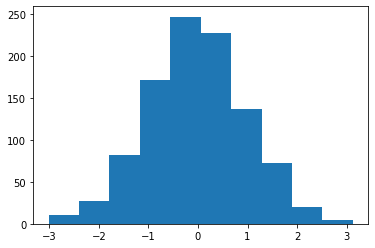

In [22]:
# ahalan = np.random.standard_normal(1000)
# plt.hist(ahalan)

In [ ]:
# The code, in a nutshell

# gm = GaussianMixture(5, tol = 0.0000001, max_iter = 1000000)
# ahalan_df = pd.DataFrame(ahalan)
# pred = gm.fit_predict(ahalan_df)
# ## 5
# pop1, pop2, pop3, pop4, pop5 = ahalan_df.loc[pred==0], ahalan_df.loc[pred==1], ahalan_df.loc[pred==2], ahalan_df.loc[pred==3], ahalan_df.loc[pred==4] 

# ## 5
# concat = pd.concat([pop1, pop2, pop3, pop4, pop5], axis=1)
# concat.columns = ['pop1', 'pop2', 'pop3', 'pop4', 'pop5']
# concat.describe()

In [31]:
# gm = GaussianMixture(5, tol = 0.0000001, max_iter = 1000000)

In [32]:
# ahalan_df = pd.DataFrame(ahalan)

In [33]:
# pred = gm.fit_predict(ahalan_df)

In [34]:
# ## 5
# pop1, pop2, pop3, pop4, pop5 = ahalan_df.loc[pred==0], ahalan_df.loc[pred==1], ahalan_df.loc[pred==2], ahalan_df.loc[pred==3], ahalan_df.loc[pred==4] 
# ## 3
# #pop1, pop2, pop3 = ahalan_df.loc[pred==0], ahalan_df.loc[pred==1], ahalan_df.loc[pred==2] #, ahalan_df.loc[pred==3], ahalan_df.loc[pred==4] 

In [35]:
# ## 5
# concat = pd.concat([pop1, pop2, pop3, pop4, pop5], axis=1)
# concat.columns = ['pop1', 'pop2', 'pop3', 'pop4', 'pop5']

# ## 3
# #concat = pd.concat([pop1, pop2, pop3], axis=1)
# #concat.columns = ['pop1', 'pop2', 'pop3']

# concat.describe()

,pop1,pop2,pop3,pop4,pop5
count,144.000000,302.000000,492.000000,23.000000,39.000000
mean,1.244160,-1.017398,0.150197,-2.447012,2.127208
std,0.202335,0.390198,0.371686,0.301991,0.365495
min,0.922971,-2.040258,-0.474142,-3.017890,1.695653
25%,1.089616,-1.272799,-0.161888,-2.655820,1.834889
50%,1.225151,-0.964128,0.130016,-2.376173,2.070754
75%,1.385101,-0.692916,0.454746,-2.192831,2.308576
max,1.666157,-0.476648,0.900973,-2.081366,3.127418


In [36]:
# 144/1000, 302/1000, 492/1000, 23/1000, 39/1000

(0.144, 0.302, 0.492, 0.023, 0.039)

In [ ]:
# CHECK THE DEFAULTS OF YOUR SKLEAN -VS.- THE DEFUALTS IN THEIR LIBRARY MIXFDR

# 1.) Comparing results of the GM algorithm for cai & sun's 09' settings 

In [177]:
def my_rbeta(num_hypo, prob_to_1, mu0, mu1, variance_0, variance_1, with_h = False): 
    
    # Z & vector h
    Z_vec = np.random.normal(0,1,num_hypo)
    vec_h = np.random.binomial(1, p=prob_to_1, size=num_hypo)

    # mu's
    mu_vec_1 = vec_h * mu1 
    mu_vec_1_0 = np.where(mu_vec_1 == 0, mu0, mu_vec_1)

    # variance & std err
    var_vec_1 = vec_h * variance_1
    var_vec_1_0 = np.where(var_vec_1 == 0, variance_0, var_vec_1)
    sqrt_var_vec_1_0 = np.sqrt(var_vec_1_0)
    
    if not with_h:
        return sqrt_var_vec_1_0 * Z_vec + mu_vec_1_0
    else:
        return sqrt_var_vec_1_0 * Z_vec + mu_vec_1_0, vec_h

In [178]:
### Cai & sun 09' setting - Study 1# --- 1
prob_to_1 = [0.15, 0.1]
#x = [0.03, 0.15, 0.27]

num_hypo = [300, 150]

mu0 = [0, 0]
mu1 = [-2, 4]

variance_0 = [1, 1]
variance_1 = [1, 1]

In [60]:
300 * 0.15

45.0

Cai and sun 2009 setting:
- Group null     - hypotheses = 255, mean = 0, var = 1
- Group non-null - hypotheses = 45, mean = -2, var = 1

My results (GaussianMixture(2, tol = 0.0001, reg_covar=0.02, max_iter = 1000000):
- Group null     - hypotheses = 259, mean = 0.15, var = 0.9
- Group non-null - hypotheses = 41, mean = -1.84, var = 1.3

In [179]:
z_study1_setting1_onegrouponly = my_rbeta(num_hypo[0], prob_to_1[0], mu0[0], mu1[0], variance_0[0], variance_1[0])

(array([ 2.,  0.,  1.,  1.,  0.,  0.,  1.,  4.,  3.,  0.,  6.,  2.,  6.,
         4.,  6.,  3.,  8.,  6., 10.,  5., 13., 17., 10., 14., 10., 10.,
        18., 19., 15., 12., 12., 12.,  8.,  8., 16.,  9.,  7.,  9.,  4.,
         4.,  3.,  0.,  0.,  1.,  1.]),
 array([-4.14597457, -3.99916745, -3.85236034, -3.70555322, -3.55874611,
        -3.411939  , -3.26513188, -3.11832477, -2.97151765, -2.82471054,
        -2.67790343, -2.53109631, -2.3842892 , -2.23748208, -2.09067497,
        -1.94386786, -1.79706074, -1.65025363, -1.50344651, -1.3566394 ,
        -1.20983229, -1.06302517, -0.91621806, -0.76941094, -0.62260383,
        -0.47579672, -0.3289896 , -0.18218249, -0.03537537,  0.11143174,
         0.25823885,  0.40504597,  0.55185308,  0.6986602 ,  0.84546731,
         0.99227442,  1.13908154,  1.28588865,  1.43269577,  1.57950288,
         1.72630999,  1.87311711,  2.01992422,  2.16673134,  2.31353845,
         2.46034556]),
 <BarContainer object of 45 artists>)

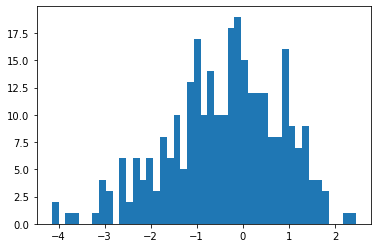

In [180]:
plt.hist(z_study1_setting1_onegrouponly, bins=45)

In [181]:
gm = GaussianMixture(3, tol = 0.0001, max_iter = 1000000)

In [182]:
z_study1_setting1_onegrouponly_df = pd.DataFrame(z_study1_setting1_onegrouponly)

In [183]:
z_study1_setting1_onegrouponly_pred = gm.fit_predict(z_study1_setting1_onegrouponly_df)

In [184]:
# 2
pop1 = z_study1_setting1_onegrouponly_df.loc[z_study1_setting1_onegrouponly_pred==0]
pop2 = z_study1_setting1_onegrouponly_df.loc[z_study1_setting1_onegrouponly_pred==1] 

concat = pd.concat([pop1, pop2], axis=1)
concat.columns = ['pop1', 'pop2']

concat.describe()

,pop1,pop2
count,188.000000,112.000000
mean,0.359723,-1.680553
std,0.694526,0.796821
min,-0.744229,-4.145975
25%,-0.187787,-2.204437
50%,0.275262,-1.449129
75%,0.902267,-1.031431
max,2.460346,-0.751672


## 1.1.) Another try, with reg_covar=0.0001

In [185]:
gm = GaussianMixture(2, tol = 0.0001, reg_covar=0.02, max_iter = 1000000)
z_study1_setting1_onegrouponly_df = pd.DataFrame(z_study1_setting1_onegrouponly)
z_study1_setting1_onegrouponly_pred = gm.fit_predict(z_study1_setting1_onegrouponly_df)
# 2
pop1 = z_study1_setting1_onegrouponly_df.loc[z_study1_setting1_onegrouponly_pred==0]
pop2 = z_study1_setting1_onegrouponly_df.loc[z_study1_setting1_onegrouponly_pred==1] 

concat = pd.concat([pop1, pop2], axis=1)
concat.columns = ['pop1', 'pop2']

concat.describe()

,pop1,pop2
count,103.000000,197.000000
mean,-1.759630,0.307858
std,0.782520,0.718825
min,-4.145975,-0.795056
25%,-2.236458,-0.228702
50%,-1.580343,0.167625
75%,-1.102113,0.874874
max,-0.803874,2.460346


In [104]:
# 2, tol = 0.0001, max_iter = 1000000
concat.describe()

,pop1,pop2
count,44.000000,256.000000
mean,-1.718738,0.154951
std,1.430496,0.846066
min,-4.393852,-1.291481
25%,-2.264965,-0.477099
50%,-1.701583,0.091051
75%,-1.481433,0.708787
max,2.964014,2.380066


In [67]:
# simple 2
concat.describe()

,pop1,pop2
count,90.000000,210.000000
mean,-1.466271,0.457178
std,0.748645,0.755784
min,-4.393852,-0.647392
25%,-1.689309,-0.135267
50%,-1.229275,0.315011
75%,-0.945694,0.901571
max,-0.658487,2.964014


# 2.) AYP 2003 schools data estimating

In [193]:
z_small = pd.read_csv('z_small.txt', header = None)
z_medium = pd.read_csv('z_medium.txt', header = None)
z_large = pd.read_csv('z_large.txt', header = None)

In [106]:
# Searching for 2 gaussians in the data
gm_small = GaussianMixture(2, tol = 0.0001, max_iter = 1000000)
gm_medium = GaussianMixture(2, tol = 0.0001, max_iter = 1000000)
gm_large = GaussianMixture(2, tol = 0.0001, max_iter = 1000000)

In [107]:
small_pred = gm_small.fit_predict(z_small)
medium_pred = gm_small.fit_predict(z_medium)
large_pred = gm_small.fit_predict(z_large)

In [109]:
small_pop1, small_pop2 = z_small.loc[small_pred==0], z_small.loc[small_pred==1]
medium_pop1, medium_pop2 = z_medium.loc[medium_pred==0], z_medium.loc[medium_pred==1]
large_pop1, large_pop2 = z_large.loc[large_pred==0], z_large.loc[large_pred==1]

In [116]:
conct = pd.concat([small_pop1, small_pop2, medium_pop1, medium_pop2, large_pop1, large_pop2], axis=1)
conct.columns = ['small_pop1', 'small_pop2', 'medium_pop1', 'medium_pop2', 'large_pop1', 'large_pop2']
conct.describe()

,small_pop1,small_pop2,medium_pop1,medium_pop2,large_pop1,large_pop2
count,350.000000,74.000000,5557.000000,341.000000,676.000000,42.000000
mean,0.094294,-3.671954,-0.357217,-16.637405,-0.206244,-28.342893
std,1.127794,4.638250,2.002579,12.005380,4.685828,4.805137
min,-2.361973,-14.493800,-6.325634,-61.121656,-15.479359,-44.172585
25%,-0.732958,-6.103881,-1.613738,-24.005858,-2.666133,-30.113564
50%,0.110886,-4.364980,-0.314744,-19.554579,-0.072236,-27.736216
75%,0.818170,-2.891241,0.904646,-8.868717,2.459158,-25.948244
max,2.932008,13.514135,6.216559,46.546419,46.004786,-17.234053


In [121]:
conct[['small_pop1','small_pop2']].describe()[:3]

,small_pop1,small_pop2
count,350.000000,74.000000
mean,0.094294,-3.671954
std,1.127794,4.638250


(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 1.600e+01, 2.100e+01, 2.900e+01, 4.300e+01,
        3.700e+01, 3.300e+01, 1.900e+01, 1.200e+01, 1.300e+01, 1.900e+01,
        2.900e+01, 1.140e+02, 4.410e+02, 1.638e+03, 2.391e+03, 8.360e+02,
        1.560e+02, 2.900e+01, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-61.1216561 , -58.9682946 , -56.8149331 , -54.66157161,
        -52.50821011, -50.35484861, -48.20148712, -46.04812562,
        -43.89476412, -41.74140263, -39.58804113, -37.43467964,
        -35.28131814, -33.12795664, -30.97459515, -28.82123365,
        -26.66787215, -24.51451066, -22.36114916, -20.20778766,
        -18.05442617, -15.90106467, -13.74770317, -11.59

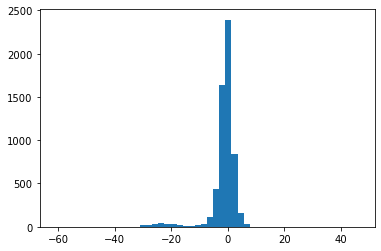

In [188]:
plt.hist(z_medium,bins = 50)

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  3.,  5.,  3.,
         8.,  4.,  9.,  6.,  9.,  6., 15., 28., 43., 68., 70., 68., 32.,
        22., 11.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  1.]),
 array([-14.49380019, -13.87140163, -13.24900307, -12.62660451,
        -12.00420594, -11.38180738, -10.75940882, -10.13701026,
         -9.5146117 ,  -8.89221314,  -8.26981458,  -7.64741602,
         -7.02501746,  -6.4026189 ,  -5.78022034,  -5.15782178,
         -4.53542322,  -3.91302466,  -3.2906261 ,  -2.66822754,
         -2.04582898,  -1.42343042,  -0.80103185,  -0.17863329,
          0.44376527,   1.06616383,   1.68856239,   2.31096095,
          2.93335951,   3.55575807,   4.17815663,   4.80055519,
          5.42295375,   6.04535231,   6.66775087,   7.29014943,
          7.91254799,   8.53494655,   9.15734511,   9.77974368,
         10.40214224,  11.0245408 ,  11.64693936,  12.26933792,
         12.89173648,  13.51413504]),

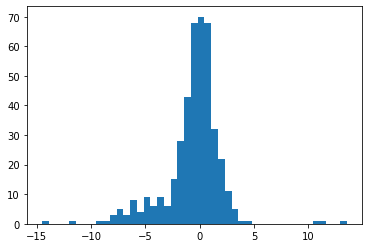

In [112]:
plt.hist(z_small,bins = 45)

In [122]:
conct[['medium_pop1','medium_pop2']].describe()[:3]

,medium_pop1,medium_pop2
count,5557.000000,341.000000
mean,-0.357217,-16.637405
std,2.002579,12.005380


(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00,
        4.000e+00, 2.400e+01, 2.800e+01, 4.700e+01, 4.000e+01, 3.700e+01,
        2.000e+01, 1.300e+01, 1.600e+01, 2.100e+01, 6.500e+01, 2.980e+02,
        1.358e+03, 2.676e+03, 1.045e+03, 1.620e+02, 2.300e+01, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([-61.1216561 , -58.72903221, -56.33640833, -53.94378444,
        -51.55116056, -49.15853667, -46.76591279, -44.3732889 ,
        -41.98066502, -39.58804113, -37.19541725, -34.80279336,
        -32.41016948, -30.01754559, -27.62492171, -25.23229782,
        -22.83967394, -20.44705005, -18.05442617, -15.66180228,
        -13.2691784 , -10.87655451,  -8.48393063,  -6.09130674,
         -3.69868286,  -1.30605897,   1.08656491,   3.4

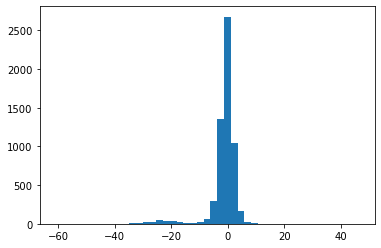

In [114]:
plt.hist(z_medium, bins=45)

In [123]:
conct[['large_pop1','large_pop2']].describe()[:3]

,large_pop1,large_pop2
count,676.000000,42.000000
mean,-0.206244,-28.342893
std,4.685828,4.805137


(array([  1.,   0.,   0.,   2.,   1.,   4.,   3.,   8.,  11.,   7.,   2.,
          1.,   1.,   1.,   2.,   5.,   9.,  13.,  21.,  53.,  94., 138.,
        142., 107.,  63.,  19.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-44.1725853 , -42.16864372, -40.16470214, -38.16076056,
        -36.15681898, -34.1528774 , -32.14893582, -30.14499424,
        -28.14105266, -26.13711108, -24.1331695 , -22.12922792,
        -20.12528633, -18.12134475, -16.11740317, -14.11346159,
        -12.10952001, -10.10557843,  -8.10163685,  -6.09769527,
         -4.09375369,  -2.08981211,  -0.08587053,   1.91807105,
          3.92201263,   5.92595421,   7.9298958 ,   9.93383738,
         11.93777896,  13.94172054,  15.94566212,  17.9496037 ,
         19.95354528,  21.95748686,  23.96142844,  25.96537002,
         27.9693116 ,  29.97325318,  31.97719476,  33.98113634,
         35.98507792,  37.98901951,  39.99296109

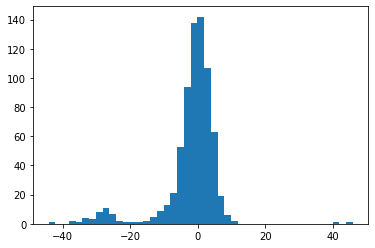

In [115]:
plt.hist(z_large, bins=45)

### 2.1.) Playing with parameters

In [ ]:
# gm_small = GaussianMixture(2, tol = 0.0001, reg_covar=0.02 , max_iter = 1000000)

In [166]:
gm_small = GaussianMixture(2, tol = 0.0001, reg_covar=0.0001, max_iter = 1000000)
gm_medium = GaussianMixture(2, tol = 0.0001, max_iter = 1000000)
gm_large = GaussianMixture(2, tol = 0.0001, max_iter = 1000000)

small_pred = gm_small.fit_predict(z_small)
medium_pred = gm_small.fit_predict(z_medium)
large_pred = gm_small.fit_predict(z_large)

small_pop1, small_pop2 = z_small.loc[small_pred==0], z_small.loc[small_pred==1]
medium_pop1, medium_pop2 = z_medium.loc[medium_pred==0], z_medium.loc[medium_pred==1]
large_pop1, large_pop2 = z_large.loc[large_pred==0], z_large.loc[large_pred==1]

conct = pd.concat([small_pop1, small_pop2, medium_pop1, medium_pop2, large_pop1, large_pop2], axis=1)
conct.columns = ['small_pop1', 'small_pop2', 'medium_pop1', 'medium_pop2', 'large_pop1', 'large_pop2']
conct[['small_pop1', 'small_pop2']].describe()[:2]

,small_pop1,small_pop2
count,350.000000,74.000000
mean,0.094294,-3.671954


In [142]:
1e-6 + 1

1.000001

# 3.) Tuning parameters towards the results of R mixfdr setting for J=5 in z_medium

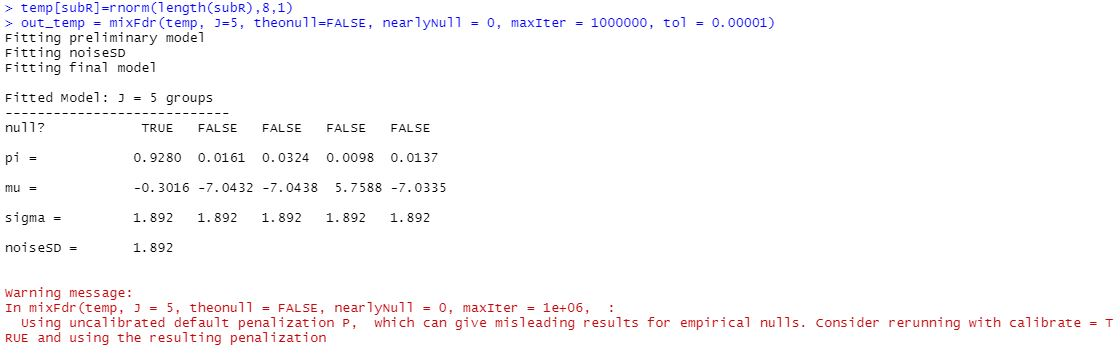

In [2]:
z_small = pd.read_csv('z_small.txt', header = None)
z_medium = pd.read_csv('z_medium.txt', header = None)
z_large = pd.read_csv('z_large.txt', header = None)

In [3]:
z_medium.shape

(5898, 1)

In [76]:
5898 * 0.927

5467.446

In [132]:
5898 *0.03

176.94

In [133]:
5898 *0.0059

34.7982

In [4]:
type(z_medium)

pandas.core.frame.DataFrame

In [5]:
#gm = GaussianMixture(5, tol = 0.00001, max_iter = 1000000)

In [189]:
gm = GaussianMixture(5, tol = 0.0000015, reg_covar = 0.2, max_iter = 1000000)
pred = gm.fit_predict(z_medium)
## 5
pop1, pop2, pop3, pop4, pop5 = z_medium.loc[pred==0], z_medium.loc[pred==1], z_medium.loc[pred==2], z_medium.loc[pred==3], z_medium.loc[pred==4] 

## 5
concat = pd.concat([pop1, pop2, pop3, pop4, pop5], axis=1)
concat.columns = ['pop1', 'pop2', 'pop3', 'pop4', 'pop5']
concat.describe()

# MEDIUM

,pop1,pop2,pop3,pop4,pop5
count,5440.000000,13.000000,214.000000,7.000000,224.000000
mean,-0.287335,-7.134301,-4.790441,5.506533,-22.392654
std,1.862589,39.222587,5.152981,0.108344,4.660543
min,-4.962753,-61.121656,-12.101422,5.359562,-33.709964
25%,-1.529583,-39.096540,-7.258569,5.450387,-25.423724
50%,-0.280270,11.047364,-5.933382,5.498082,-22.513672
75%,0.909568,22.336694,-5.208385,5.542500,-19.321605
max,5.236190,46.546419,10.154604,5.702310,-12.467536


In [215]:
#214/
z_medium.shape[0]

5898

In [ ]:
# 1, 2, 4 are the null distributions

In [ ]:
# tied - - gm = GaussianMixture(5, covariance_type="tied", tol = 0.00001, max_iter = 1000000)
0.00001 >> 5640 / 5545

In [27]:
0.0001  >> 4136
0.00001  >> 4875.000000 |  reg_covar = 0.01 >> 4944 | reg_covar = 0.1 >> 5276 | reg_covar = 0.2 >> 5367
0.000001 >> 4443

# FOUND THE RIGHT PARAMETERS - AROUND gm = GaussianMixture(5, tol = 0.0000015, reg_covar = 0.2, max_iter = 1000000)

TypeError: unsupported operand type(s) for >>: 'float' and 'int'

In [190]:
# SMALL

gm = GaussianMixture(5, tol = 0.0000015, reg_covar = 0.2, max_iter = 1000000)
pred = gm.fit_predict(z_small)
## 5
pop1, pop2, pop3, pop4, pop5 = z_small.loc[pred==0], z_small.loc[pred==1], z_small.loc[pred==2], z_small.loc[pred==3], z_small.loc[pred==4] 

## 5
concat = pd.concat([pop1, pop2, pop3, pop4, pop5], axis=1)
concat.columns = ['pop1', 'pop2', 'pop3', 'pop4', 'pop5']
concat.describe()

# SMALL

,pop1,pop2,pop3,pop4,pop5
count,347.000000,3.000000,19.000000,53.000000,2.000000
mean,-0.061637,11.867877,2.936356,-5.334494,-13.000060
std,1.113600,1.438391,0.627412,1.620718,2.112468
min,-2.885443,10.854104,2.272653,-9.347986,-14.493800
25%,-0.815527,11.044749,2.465547,-6.357254,-13.746930
50%,-0.017365,11.235393,2.752676,-5.036904,-13.000060
75%,0.742870,12.374764,3.237118,-3.963450,-12.253190
max,2.248370,13.514135,4.719876,-2.908635,-11.506319


In [213]:
#53/
z_small.shape[0]

424

In [191]:
# LARGE

gm = GaussianMixture(5, tol = 0.0000015, reg_covar = 0.2, max_iter = 1000000)
pred = gm.fit_predict(z_large)
## 5
pop1, pop2, pop3, pop4, pop5 = z_large.loc[pred==0], z_large.loc[pred==1], z_large.loc[pred==2], z_large.loc[pred==3], z_large.loc[pred==4] 

## 5
concat = pd.concat([pop1, pop2, pop3, pop4, pop5], axis=1)
concat.columns = ['pop1', 'pop2', 'pop3', 'pop4', 'pop5']
concat.describe()


# LARGE

,pop1,pop2,pop3,pop4,pop5
count,156.000000,41.000000,44.000000,475.000000,2.000000
mean,4.575323,-28.613840,-9.924868,-1.095425,43.307953
std,1.637080,4.528374,2.573272,2.301686,3.813898
min,2.599288,-44.172585,-17.234053,-6.548246,40.611120
25%,3.335547,-30.217801,-11.672689,-2.768097,41.959536
50%,4.191597,-27.816143,-9.283342,-0.844625,43.307953
75%,5.146313,-25.971451,-7.931764,0.789716,44.656369
max,10.526613,-18.873944,-6.708534,2.557259,46.004786


In [214]:
#44/
z_large.shape[0]

718

In [ ]:
# 1, 4, 5 are the nulls

# 4.) BACK UP

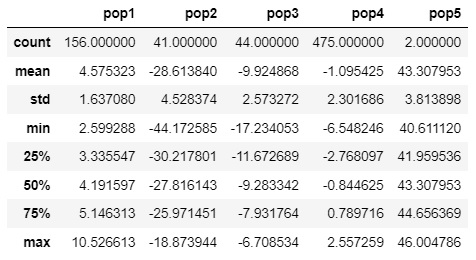

In [ ]:
# everything becomes a nested list of 3X5

num_hypo = [[[347],[19],[2],[3],[53]], # SMALL - FIRST 3 IS THE NULL
            [[5440],[13],[7],[214],[224]], # MEDIUM - FIRST 3 IS THE NULL
            [[156],[475],[2],[41],[44]]] # LARGE - FIRST 3 IS THE NULL

prob_to_1 = [[[0.818],[0.044],[0.004],[0.007],[0.125]], # SMALL - FIRST 3 IS THE NULL
            [[0.922],[0.002],[0.001],[0.036],[0.037]], # MEDIUM - FIRST 3 IS THE NULL
            [[0.217],[0.661],[0.0027],[0.057],[0.061]]] # LARGE - FIRST 3 IS THE NULL

mu0 = [[[-0.061],[2.93],[-13]], # SMALL
      [[-0.287],[-7.13],[5.506]], # MEDIUM 
      [[4.575],[-1.095],[43.3079]]] # LARGE 

mu1 = [[[11.867],[-5.334]], # SMALL 
      [[-4.79],[-22.392]], # MEDIUM 
      [[-28.613],[-9.924]]] # LARGE

# You should write here the REAL variance (sigma^2) [BTW, they're independent, not as in the DEPENDENT setting code]

variance_0 = [[[1.24],[0.3936],[4.4625]], # SMALL 
             [[3.4692],[1538.411],[0.0117]], # MEDIUM 
             [[2.68],[5.2977],[14.5458]]] # LARGE

variance_1 = [[[2.0689],[2.6267]], # SMALL 
             [[26.5532],[21.7206]], # MEDIUM 
             [[20.5061],[6.6217]]] # LARGE 